In [1]:
library(magrittr)
library(tibble)
library(gutenbergr)
library(dplyr)
library(tidytext)
library(ggplot2)
library(tidyverse)
library(quanteda)
library(topicmodels)
library(topicdoc)
library(tm)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
Package version: 3.2.4
Unicode version: 13.0
ICU version: 69.1

Parallel computing: 8 of 8 threads used.

See https://quanteda.io for tutorials and examples.

Loading required package: NLP


Attaching package: ‘NLP’


The following objects are masked from ‘package:quanteda’:

    meta, meta<-


The following object is masked from ‘package:ggplot2’:

    annotate


In [23]:


ldaTopics <- function(booksId, nTopics = 2) {
g <- gutenberg_metadata
v <- gutenberg_download(booksId) 
books <- g[g$gutenberg_id %in% booksId,c("gutenberg_id","title")]
#books
v %<>% left_join(books) %>%
    mutate(gutenberg_id = NULL)
    
df <- v %>% 
    group_by(title) %>% 
    summarise(text = paste(text, collapse = " ")) %>%
    corpus()
      
#tdm of books to load into LDA
#dfm instead of TDM from https://i.amcat.nl/lda/1_textanalysis.html
                  
tdm  <- dfm(df, remove=stopwords("english"), remove_punct=T)
    
# print(tdm)
    
#LDA model
tdm_lda <- LDA(tdm, k = nTopics)
tdm_topics <- tidy(tdm_lda, matrix = "beta")
    

tdm_top_terms <- tdm_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)
    

gg <- tdm_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") + scale_x_reordered() + coord_flip()
    
print(gg)
    
#coherence
    
coh <- topic_diagnostics(tdm_lda, tdm)
print(coh)

}

Joining, by = "gutenberg_id"
Warning message:
“'dfm.corpus()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”


  topic_num topic_size mean_token_length dist_from_corpus tf_df_dist
1         1   7329.465               4.7        0.2719423   43.74662
2         2   6209.535               5.9        0.3034285   44.35122
  doc_prominence topic_coherence topic_exclusivity
1              2        26.12904          7.372757
2              1        28.27415          8.384091


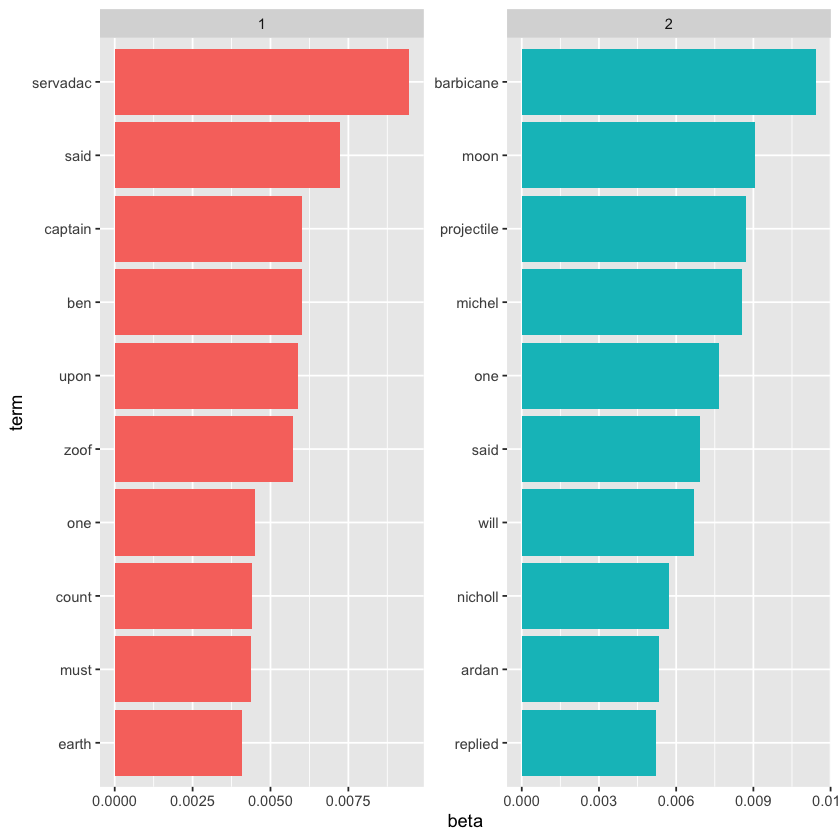

In [24]:
#dla książek Verne
booksVerne <- c(1353, 83, 16085)

ldaTopics(booksVerne)

Joining, by = "gutenberg_id"
Warning message:
“'dfm.corpus()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”


  topic_num topic_size mean_token_length dist_from_corpus tf_df_dist
1         1   5787.282               4.2        0.1847584   65.49665
2         2   5788.718               3.7        0.1918905   69.79868
  doc_prominence topic_coherence topic_exclusivity
1              3        23.30225          8.264334
2              3        23.30225          8.121119


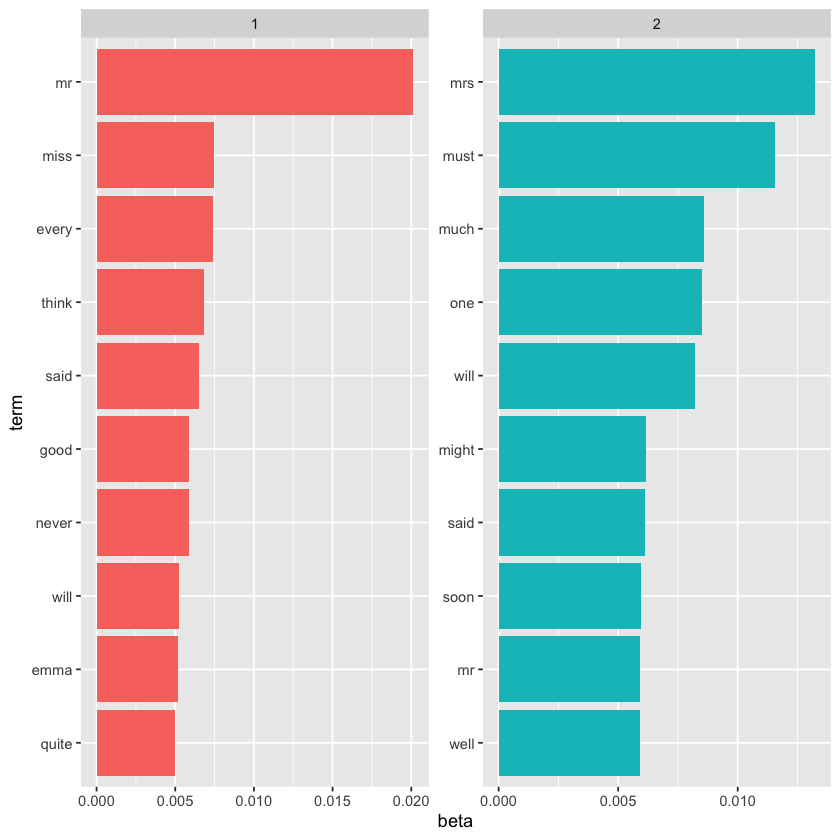

In [25]:
#dla książek Austen
booksAusten <- c(105, 158, 1342) 

ldaTopics(booksAusten)

Joining, by = "gutenberg_id"
Warning message:
“'dfm.corpus()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”


  topic_num topic_size mean_token_length dist_from_corpus tf_df_dist
1         1   5449.721               5.0        0.2958894   39.26098
2         2    886.576               4.2        0.6669321   25.97552
3         3   4112.703               4.8        0.4328405   30.82596
  doc_prominence topic_coherence topic_exclusivity
1              1        19.75938          6.943944
2              1        22.06084          9.662047
3              1        21.77316          7.869931


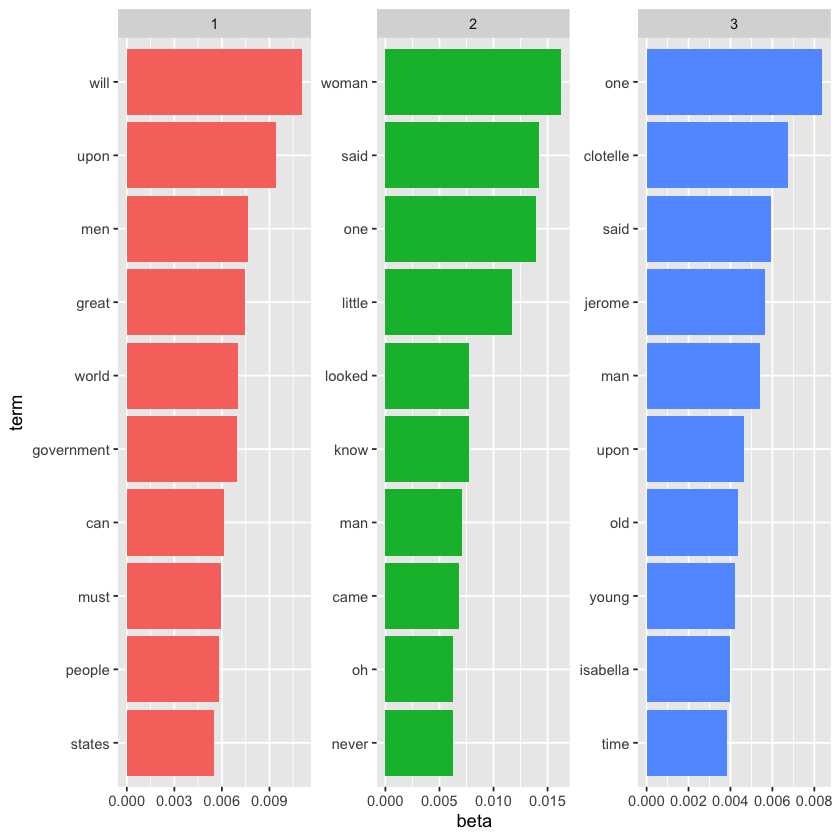

In [26]:
#dla obu zbiorów, 3 tematy
ldaTopics(booksVerne+booksAusten, nTopics = 3)